In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [3]:
df_FPT = pd.read_csv('FPT.csv')
df_FPT.head(5)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [3]:
#EDA
profile_FPT = ProfileReport(df_FPT, title='EDA report')

profile_FPT.to_file(output_file="EDA_FPT.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 252.09it/s]


In [8]:
#PNJ
df_PNJ = pd.read_csv('PNJ.csv')
df_PNJ.head(5)

profile_PNJ = ProfileReport(df_PNJ, title='EDA report')
profile_PNJ.to_file(output_file="EDA_PNJ.html")

#MSN
df_MSN = pd.read_csv('MSN.csv')
df_MSN.head(5)

profile_MSN = ProfileReport(df_MSN, title='EDA report')
profile_MSN.to_file(output_file="EDA_MSN.html")

#VIC
df_VIC = pd.read_csv('VIC.csv')
df_VIC.head(5)

profile_VIC = ProfileReport(df_VIC, title='EDA report')
profile_VIC.to_file(output_file="EDA_VIC.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


In [32]:
df_observation = df_FPT.iloc[:, :]
df_observation.index = pd.to_datetime(df_FPT['Date/Time'], format='%m/%d/%Y %H:%M')
df_observation = df_observation.drop(['Date/Time'], axis=1)
df_observation

,Ticker,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,
2018-12-25 09:15:00,FPT,30.89,30.89,30.89,30.89,35410,0
2018-12-25 09:16:00,FPT,30.81,30.81,30.81,30.81,190,0
2018-12-25 09:17:00,FPT,30.74,30.81,30.74,30.74,1120,0
2018-12-25 09:18:00,FPT,30.74,30.74,30.74,30.74,2120,0
2018-12-25 09:19:00,FPT,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...
2020-12-22 14:24:00,FPT,58.20,58.20,58.20,58.20,27470,0
2020-12-22 14:25:00,FPT,58.20,58.20,58.20,58.20,14820,0
2020-12-22 14:26:00,FPT,58.20,58.20,58.20,58.20,500,0


In [33]:
df_observation = df_observation.resample("d").last().dropna()

In [10]:
print(df_observation.describe())
print(df_observation.info())

             Open        High         Low       Close        Volume  \
count  499.000000  499.000000  499.000000  499.000000  4.990000e+02   
mean    44.332044   44.332405   44.331904   44.332144  1.051460e+05   
std      6.757076    6.756860    6.757361    6.757144  1.097400e+05   
min     30.440000   30.440000   30.440000   30.440000  1.000000e+03   
25%     38.090000   38.090000   38.090000   38.090000  4.152500e+04   
50%     46.520000   46.520000   46.520000   46.520000  7.394000e+04   
75%     49.080000   49.080000   49.080000   49.080000  1.251350e+05   
max     58.100000   58.100000   58.100000   58.100000  1.255930e+06   

       Open Interest  
count          499.0  
mean             0.0  
std              0.0  
min              0.0  
25%              0.0  
50%              0.0  
75%              0.0  
max              0.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 499 entries, 2018-12-25 to 2020-12-22
Data columns (total 7 columns):
 #   Column         Non-Null C

d:\Coding\AI\Weather Forecasting LSTM\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Coding\AI\Weather Forecasting LSTM\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Coding\AI\Weather Forecasting LSTM\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Coding\AI\Weather Forecasting LSTM\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

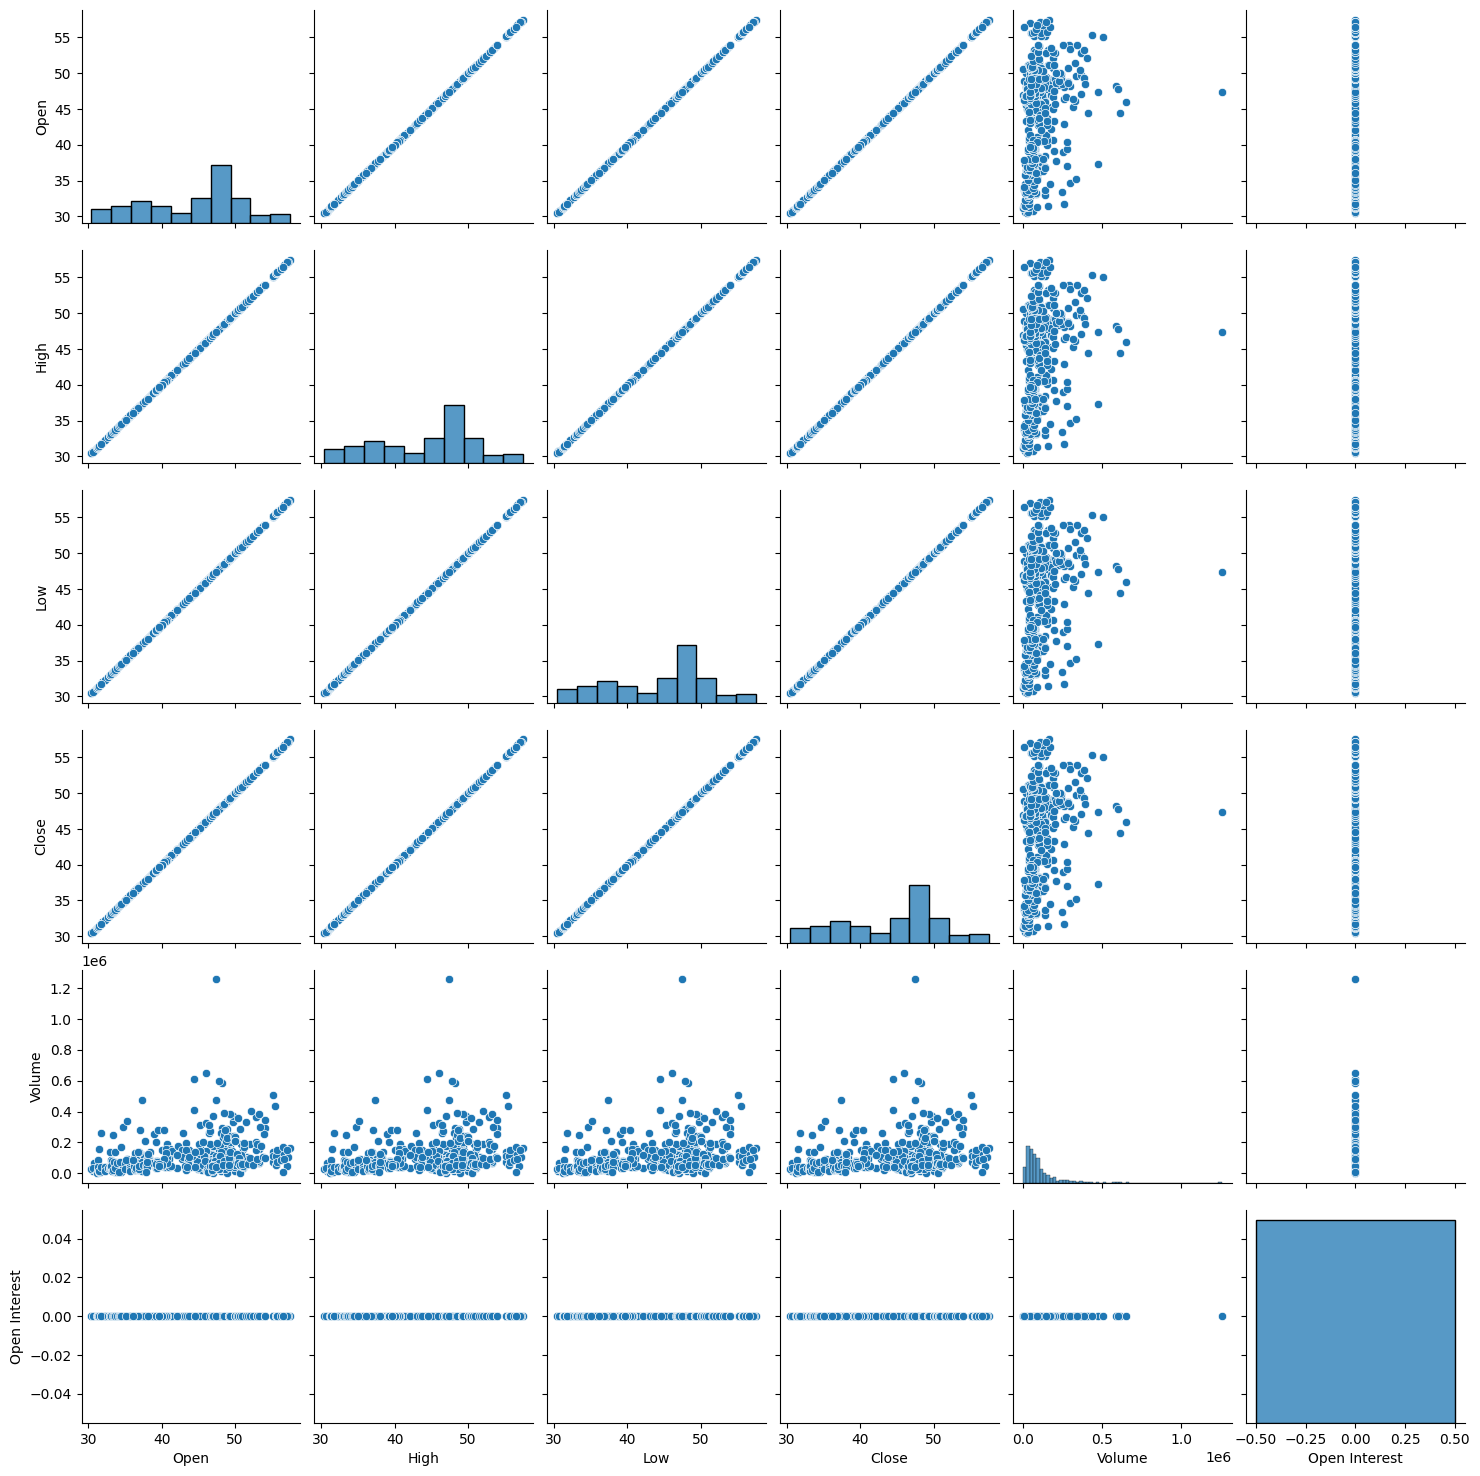

In [62]:
sns.pairplot(df_observation)

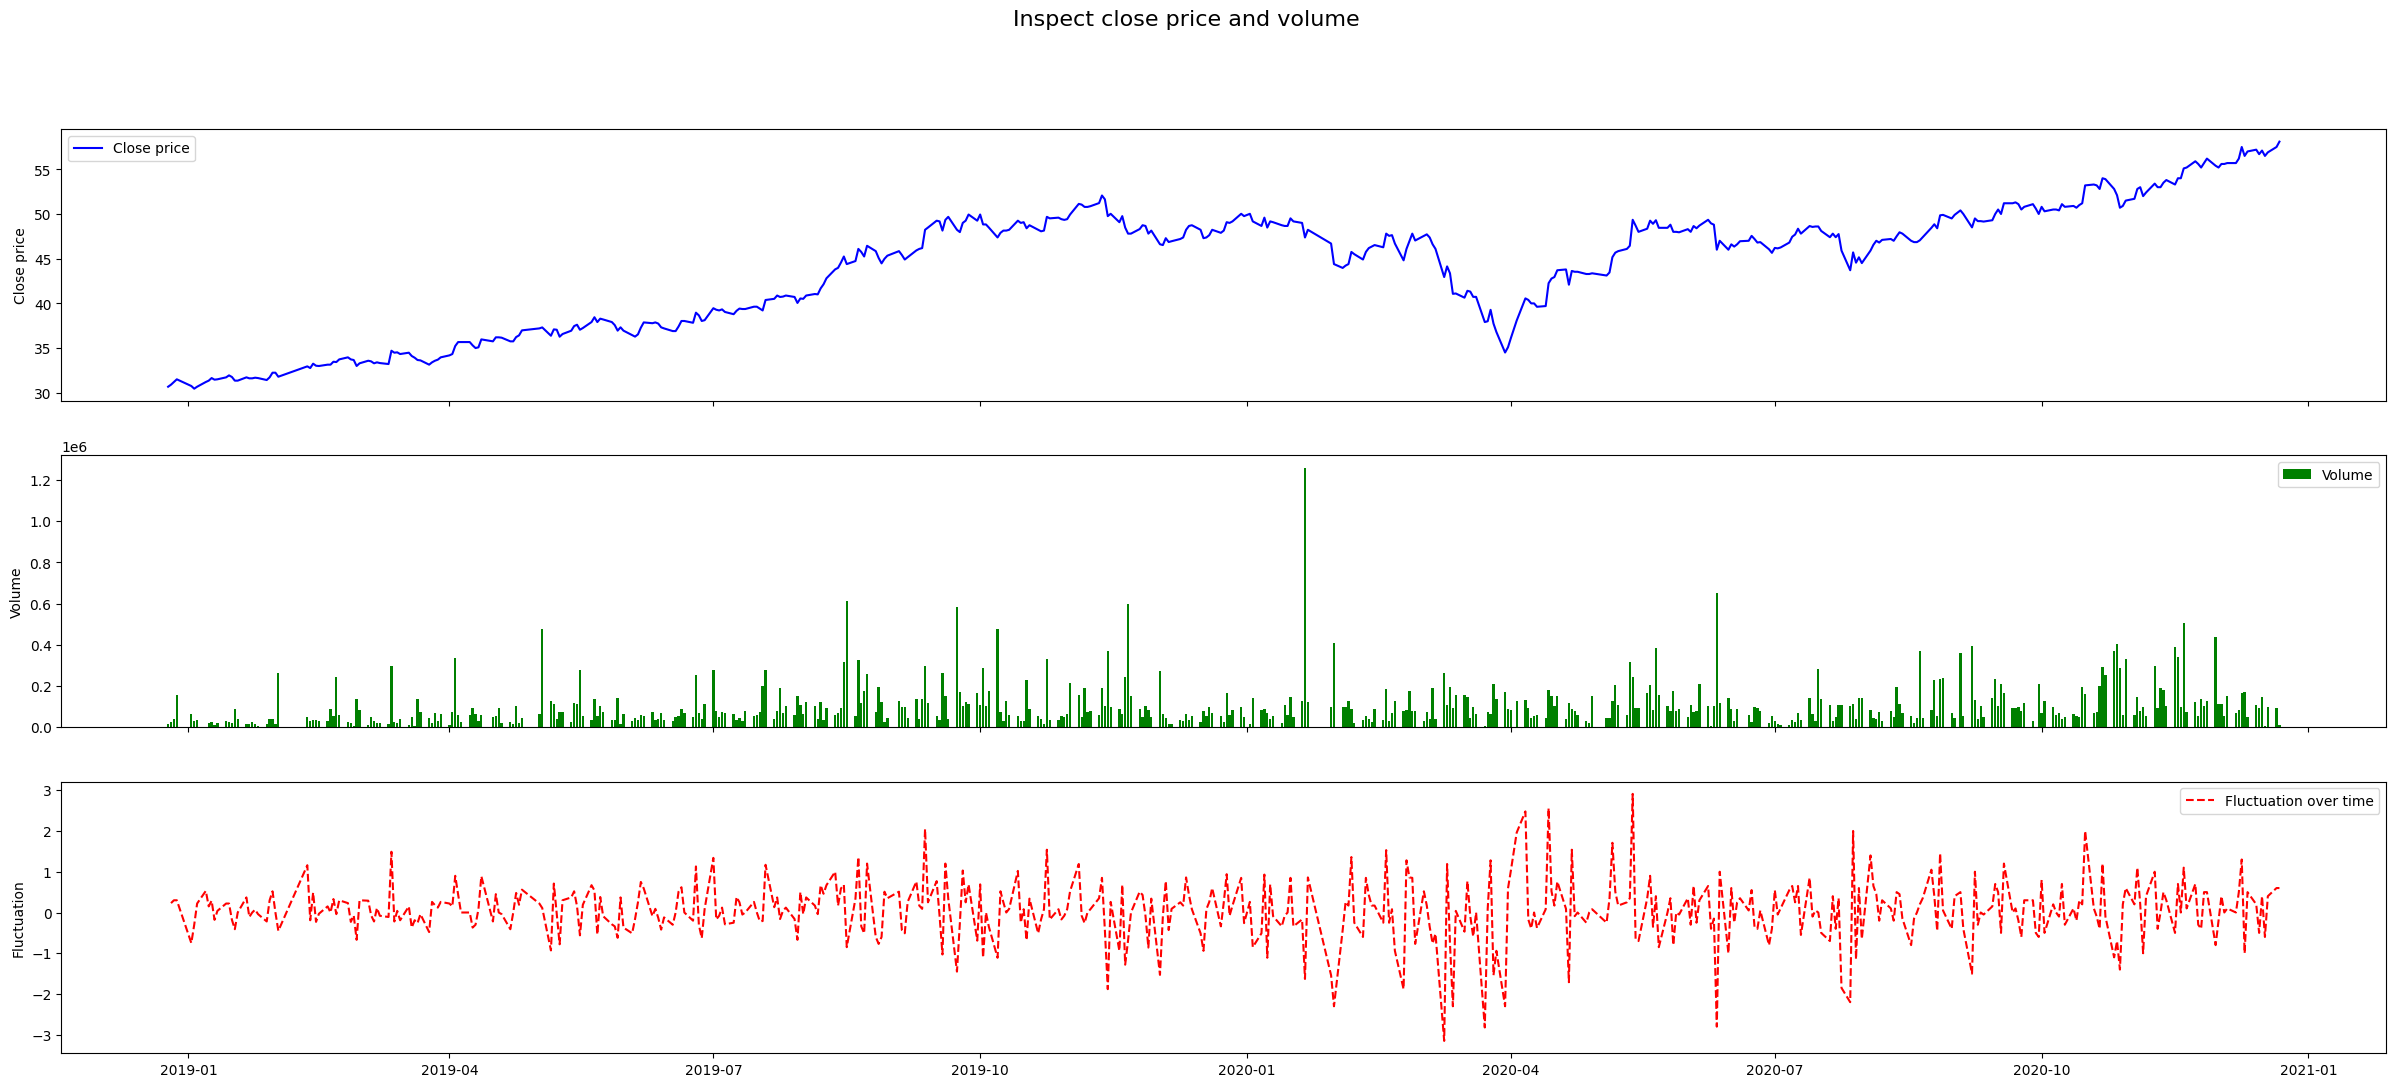

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 12), sharex=True)
ax1.plot(df_observation.index, df_observation['Close'], label='Close price', color='blue')
ax1.set_ylabel('Close price')
ax1.legend()

ax2.bar(df_observation.index, df_observation['Volume'], label='Volume', color='green')
ax2.set_ylabel('Volume')
ax2.legend()

ax3.plot(df_observation.index, df_observation['Close'].diff(), label='Fluctuation over time', linestyle='--', color='red')
ax3.set_ylabel('Fluctuation')
ax3.legend()

plt.suptitle('Inspect close price and volume', fontsize=16)
plt.show()

In [11]:
df_observation = df_observation['Close']
df_observation

Date/Time
2018-12-25    30.66
2018-12-26    30.89
2018-12-27    31.19
2018-12-28    31.49
2019-01-02    30.74
              ...  
2020-12-16    57.10
2020-12-17    56.50
2020-12-18    56.90
2020-12-21    57.50
2020-12-22    58.10
Name: Close, Length: 499, dtype: float64

In [12]:
#Create new dataframe with 7 days prior
def convert__previous_days_df(df, number_of_observations):
    new_df = pd.DataFrame(index=df.index[number_of_observations:], columns=[f'Close-{i}' for i in range(number_of_observations, 0, -1)] + ['Close'])

    for i in range(number_of_observations, 0, -1):
        new_df[f'Close-{i}'] = df.shift(i)

    new_df['Close'] = df.values[number_of_observations:]

    return new_df


converted_df = convert__previous_days_df(df_observation, number_of_observations=7)
converted_df

,Close-7,Close-6,Close-5,Close-4,Close-3,Close-2,Close-1,Close
Date/Time,,,,,,,,
2019-01-07,30.66,30.89,31.19,31.49,30.74,30.44,30.66,31.19
2019-01-08,30.89,31.19,31.49,30.74,30.44,30.66,31.19,31.34
2019-01-09,31.19,31.49,30.74,30.44,30.66,31.19,31.34,31.63
2019-01-10,31.49,30.74,30.44,30.66,31.19,31.34,31.63,31.45
2019-01-11,30.74,30.44,30.66,31.19,31.34,31.63,31.45,31.49
...,...,...,...,...,...,...,...,...
2020-12-16,55.70,56.20,57.50,56.50,57.00,57.20,56.70,57.10
2020-12-17,56.20,57.50,56.50,57.00,57.20,56.70,57.10,56.50
2020-12-18,57.50,56.50,57.00,57.20,56.70,57.10,56.50,56.90


In [13]:
dates = converted_df.index.copy()
converted_df = converted_df.to_numpy()
X = converted_df[:, :-1]
y = converted_df[:, -1]
print(X.shape)
print(y.shape)
print(dates.shape)

(492, 7)
(492,)
(492,)


In [14]:
from sklearn.preprocessing import MinMaxScaler

train_size = 0.8
val_size = 0.1
test_size = 0.1

num_samples = len(df_observation.index)
num_train = int(train_size * num_samples)
num_val = int(val_size * num_samples)

dates_train = dates[:num_train]
dates_val = dates[num_train:num_train+num_val]
dates_test = dates[num_train+num_val:]

X_train = X[:num_train]
X_val = X[num_train:num_train+num_val]
X_test = X[num_train+num_val:]

y_train = y[:num_train]
y_val = y[num_train:num_train+num_val]
y_test = y[num_train+num_val:]

sc = MinMaxScaler(feature_range=(0, 1))
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.fit_transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train = sc.fit_transform(y_train)
y_val = sc.fit_transform(y_val)
y_test = sc.fit_transform(y_test)

print("X_train: ", X_train.shape)
print("X_val: ", X_val.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_val: ", y_val.shape)
print("y_test: ", y_test.shape)
print("Dates train: ", dates_train.shape)
print("Dates val: ", dates_val.shape)
print("Dates test: ", dates_test.shape)


X_train:  (399, 7, 1)
X_val:  (49, 7, 1)
X_test:  (44, 7, 1)
y_train:  (399, 1)
y_val:  (49, 1)
y_test:  (44, 1)
Dates train:  (399,)
Dates val:  (49,)
Dates test:  (44,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.callbacks import EarlyStopping
import tensorflow as tf

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="mean_squared_error")
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 7, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 7, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 7, 50)             20200     
                                                                 
 dropout_2 (Dropout)         (None, 7, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 7, 50)            

In [ ]:
his = tf.keras.callbacks.History()
model.fit(X_train, y_train, epochs = 100, batch_size = 12, validation_data=(X_val, y_val), callbacks=[tf.keras.callbacks.CSVLogger('his.csv')])

In [ ]:
model.save('weight.h5')

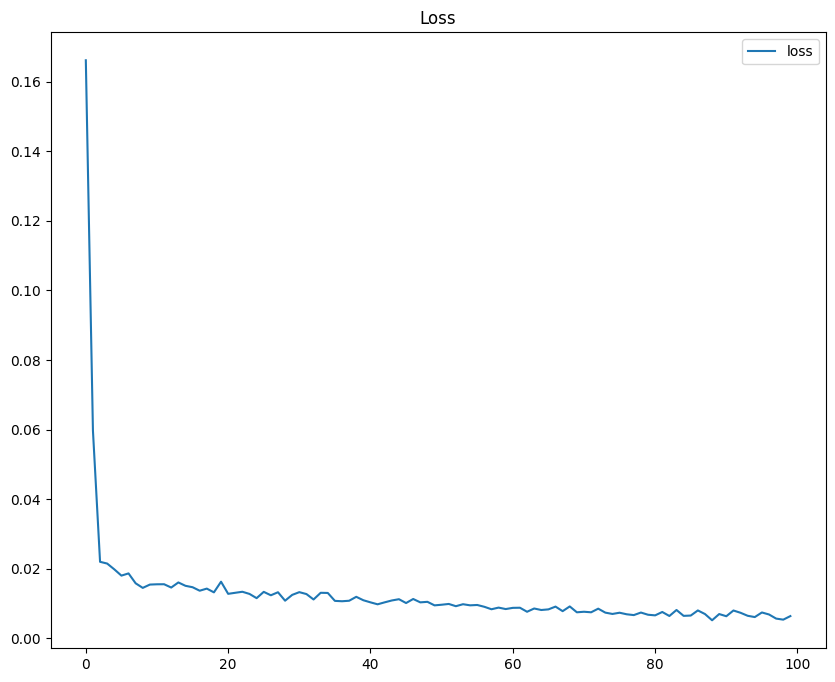

In [48]:
history = pd.read_csv('his.csv')
plt.figure(figsize=(10,8))
plt.plot(history['epoch'], history['loss'], label="loss")
plt.title('Loss')
plt.legend()
plt.show()


In [16]:
from keras.models import load_model

model = load_model("weight.h5")

2/2 [==============================] - 6s 8ms/step


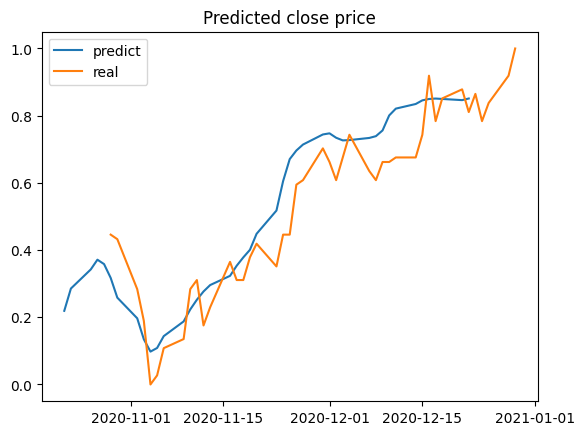

In [17]:
y_pred = model.predict(X_test)

plt.plot(dates_test, y_pred, label='predict')
plt.plot(dates_test + pd.to_timedelta(7, 'D'), y_test, label='real')
plt.title('Predicted close price')
plt.legend()
plt.show()

In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.016492832375687737
Mean Absolute Error (MAE): 0.10313044359372046


In [19]:
def find_nearest_previous_price(predicted_dates, observation_dates, observation_prices):
    nearest_prices = []
    for pred_date in predicted_dates:
        nearest_index = np.argmin(np.abs(observation_dates - pred_date))
        nearest_prices.append(observation_prices[nearest_index])
    nearest_prices = np.array(nearest_prices).reshape(-1, 1)
    nearest_prices = sc.fit_transform(nearest_prices)
    return nearest_prices

In [20]:
nearest_previous_prices = find_nearest_previous_price(dates_test, df_observation.index, df_observation)

price_changes = y_pred - nearest_previous_prices

print(y_pred.shape)
print(price_changes.shape)

(44, 1)
(44, 1)


C:\Users\Acer\AppData\Local\Temp\ipykernel_7124\1754198148.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_prices.append(observation_prices[nearest_index])


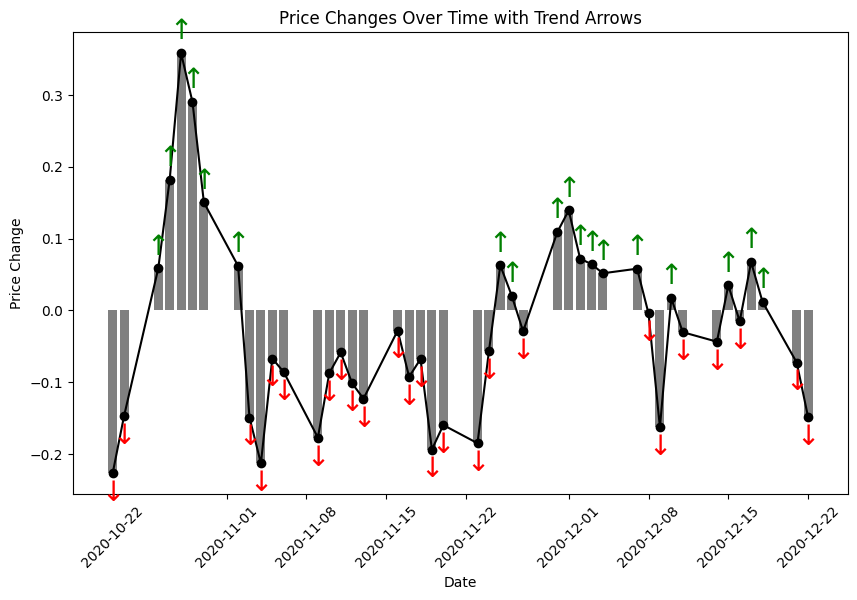

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(dates_test, price_changes.flatten(), color='black', marker='o')
plt.bar(dates_test, price_changes.flatten(), color='gray')

for i in range(len(price_changes)):
    if price_changes[i] > 0:
        plt.annotate('↑', (dates_test[i], price_changes[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=20, color='green')
    elif price_changes[i] < 0:
        plt.annotate('↓', (dates_test[i], price_changes[i]), textcoords="offset points", xytext=(0,-20), ha='center', fontsize=20, color='red')

plt.xlabel('Date')
plt.ylabel('Price Change')
plt.title('Price Changes Over Time with Trend Arrows')
plt.xticks(rotation=45)
plt.show()
